# Lesson 3. Coordinate Reference Systems (CRS) & Map Projections

Building off of what we learned in the previous notebook, we'll get to understand an integral aspect of geospatial data: Coordinate Reference Systems.

- 3.1 California County Shapefile
- 3.2 USA State Shapefile
- 3.3 Plot the Two Together
- 3.4 Coordinate Reference System (CRS)
- 3.5 Getting the CRS
- 3.6 Setting the CRS
- 3.7 Transforming or Reprojecting the CRS
- 3.8 Plotting States and Counties Togther
- 3.9 Recap
- **Exercise**: CRS Management

<br>
<font color='grey'>
    <b>Instructor Notes</b>

- Datasets used
    - ‘notebook_data/california_counties/CaliforniaCounties.shp’
    - ‘notebook_data/us_states/us_states.shp’
    - ‘notebook_data/census/Places/cb_2018_06_place_500k.zip’

- Expected time to complete
    - Lecture + Questions: 45 minutes
    - Exercises: 10 minutes
</font>

### Import Libraries

In [1]:
library(sf)
library(tmap)

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.2



## 3.1 California County shapefile
Let's go ahead and bring back in our California County shapefile. As before, we can read the file in using `st_read` and plot it straight away.

Reading layer `CaliforniaCounties' from data source `/home/drew/Desktop/stuff/berk/dlab/Geospatial-Fundamentals-in-R-with-sf/rewrite/notebook_data/california_counties/CaliforniaCounties.shp' using driver `ESRI Shapefile'
Simple feature collection with 58 features and 58 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -374445.4 ymin: -604500.7 xmax: 540038.5 ymax: 450022
projected CRS:  NAD83 / California Albers


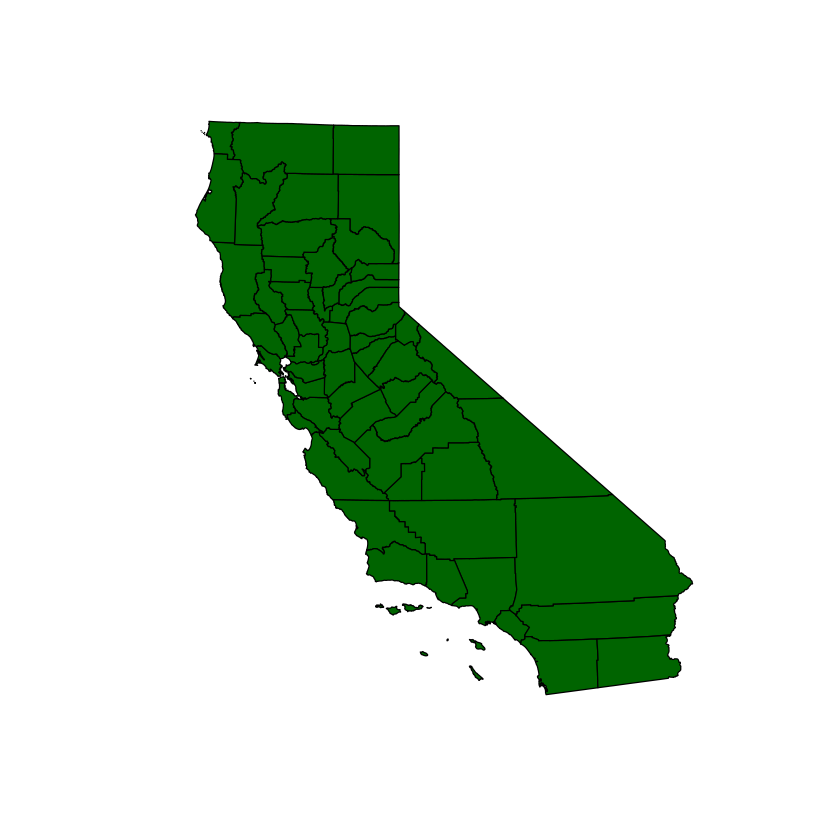

In [2]:
counties = st_read('notebook_data/california_counties/CaliforniaCounties.shp')
plot(counties$geometry, col='darkgreen')

Even if we have an awesome map like this, sometimes we want to have more geographical context, or we just want additional information. We're going to try **overlaying** our counties `sf` data.frame on our USA states shapefile.

## 3.2 USA State shapefile

We're going to bring in our states geodataframe, and let's do the usual operations to start exploring our data.

In [3]:
# Read in states shapefile
states = st_read('notebook_data/us_states/us_states.shp')

Reading layer `us_states' from data source `/home/drew/Desktop/stuff/berk/dlab/Geospatial-Fundamentals-in-R-with-sf/rewrite/notebook_data/us_states/us_states.shp' using driver `ESRI Shapefile'
Simple feature collection with 56 features and 3 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -179.1489 ymin: -14.5487 xmax: 179.7785 ymax: 71.36516
geographic CRS: WGS 84


In [4]:
# Look at the first few rows
head(states)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

,STATE,GEOID,ABBREV,geometry
,<chr>,<chr>,<chr>,<MULTIPOLYGON [°]>
1,Alabama,01,AL,MULTIPOLYGON (((-88.05338 3...
2,Alaska,02,AK,MULTIPOLYGON (((-134.7373 5...
3,Arizona,04,AZ,MULTIPOLYGON (((-114.8163 3...
4,Arkansas,05,AR,MULTIPOLYGON (((-94.61783 3...
5,California,06,CA,MULTIPOLYGON (((-118.6044 3...
6,Colorado,08,CO,MULTIPOLYGON (((-109.0603 3...


In [5]:
# Count how many rows and columns we have
dim(states)

[1] 56  4

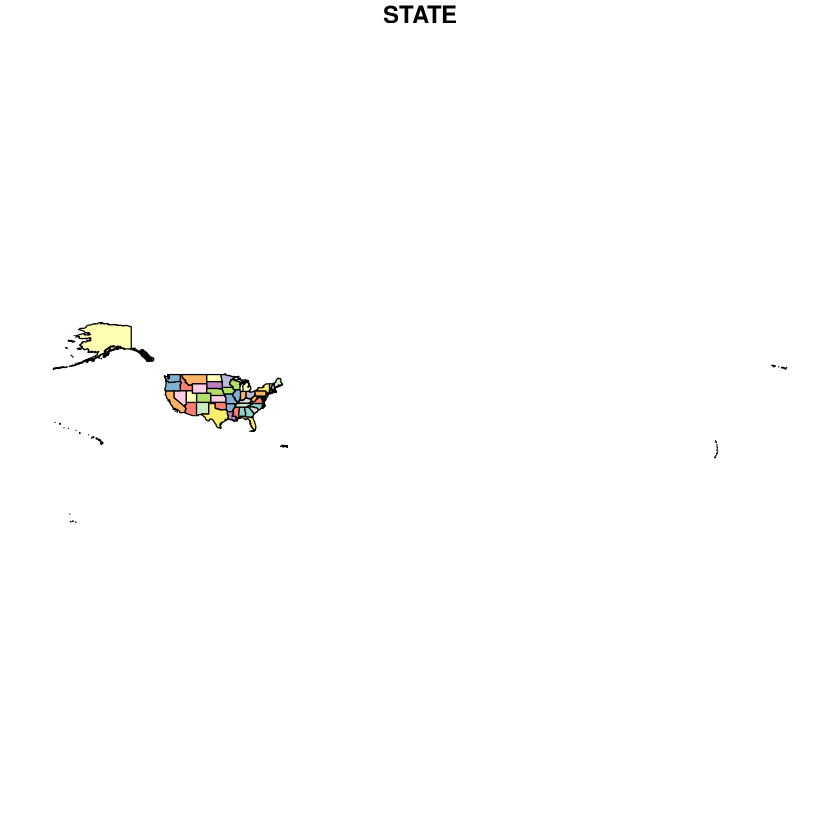

In [7]:
# Plot our states data
plot(states['STATE'])

You might have noticed that our plot extends beyond the 50 states. Let's double check what states we have included in our data.

In [8]:
states$STATE

[1] "Alabama"                                     
 [2] "Alaska"                                      
 [3] "Arizona"                                     
 [4] "Arkansas"                                    
 [5] "California"                                  
 [6] "Colorado"                                    
 [7] "Connecticut"                                 
 [8] "Delaware"                                    
 [9] "District of Columbia"                        
[10] "Georgia"                                     
[11] "Hawaii"                                      
[12] "Idaho"                                       
[13] "Illinois"                                    
[14] "Indiana"                                     
[15] "Iowa"                                        
[16] "Kansas"                                      
[17] "Maryland"                                    
[18] "Minnesota"                                   
[19] "Mississippi"                                 
[20] "Montana"                                     
[21] "Nevada"                                      
[22] "New Jersey"                                  
[23] "New Mexico"                                  
[24] "North Dakota"                                
[25] "Oklahoma"                                    
[26] "Pennsylvania"                                
[27] "South Carolina"                              
[28] "South Dakota"                                
[29] "Utah"                                        
[30] "Vermont"                                     
[31] "West Virginia"                               
[32] "Wyoming"                                     
[33] "American Samoa"                              
[34] "Puerto Rico"                                 
[35] "Florida"                                     
[36] "Kentucky"                                    
[37] "Louisiana"                                   
[38] "Maine"                                       
[39] "Massachusetts"                               
[40] "Michigan"                                    
[41] "Missouri"                                    
[42] "Nebraska"                                    
[43] "New Hampshire"                               
[44] "New York"                                    
[45] "North Carolina"                              
[46] "Ohio"                                        
[47] "Oregon"                                      
[48] "Rhode Island"                                
[49] "Tennessee"                                   
[50] "Texas"                                       
[51] "Virginia"                                    
[52] "Washington"                                  
[53] "Wisconsin"                                   
[54] "Guam"                                        
[55] "Commonwealth of the Northern Mariana Islands"
[56] "United States Virgin Islands"

Beyond the 50 states we seem to have American Samoa, Puerto Rico, Guam, Commonwealth of the Northern Mariana Islands, and United States Virgin Islands included in this geodataframe. To make our map cleaner, let's limit the states to the contiguous states (so we'll also exclude Alaska and Hawaii).

In [9]:
# Define list of non-contiguous states
non_contiguous_us = c('American Samoa','Puerto Rico','Guam',
                      'Commonwealth of the Northern Mariana Islands',
                      'United States Virgin Islands', 'Alaska','Hawaii')
# Limit data according to above list
states_limited = states[!states$STATE %in% non_contiguous_us, ]

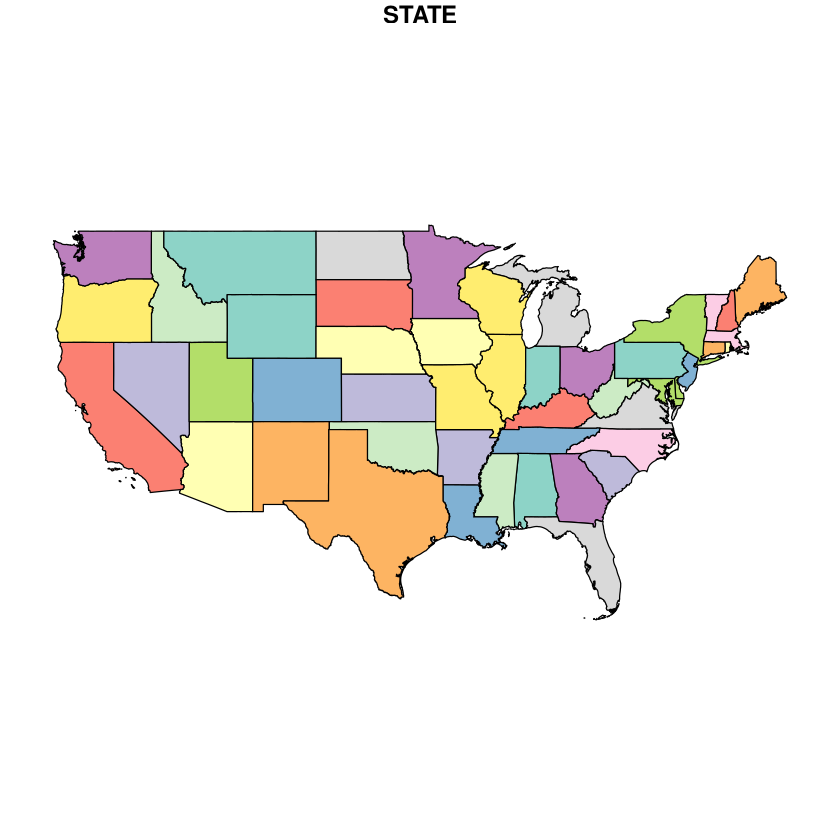

In [10]:
# Plot it
plot(states_limited['STATE'])

To prepare for our mapping overlay, let's make our states a nice, light grey color.

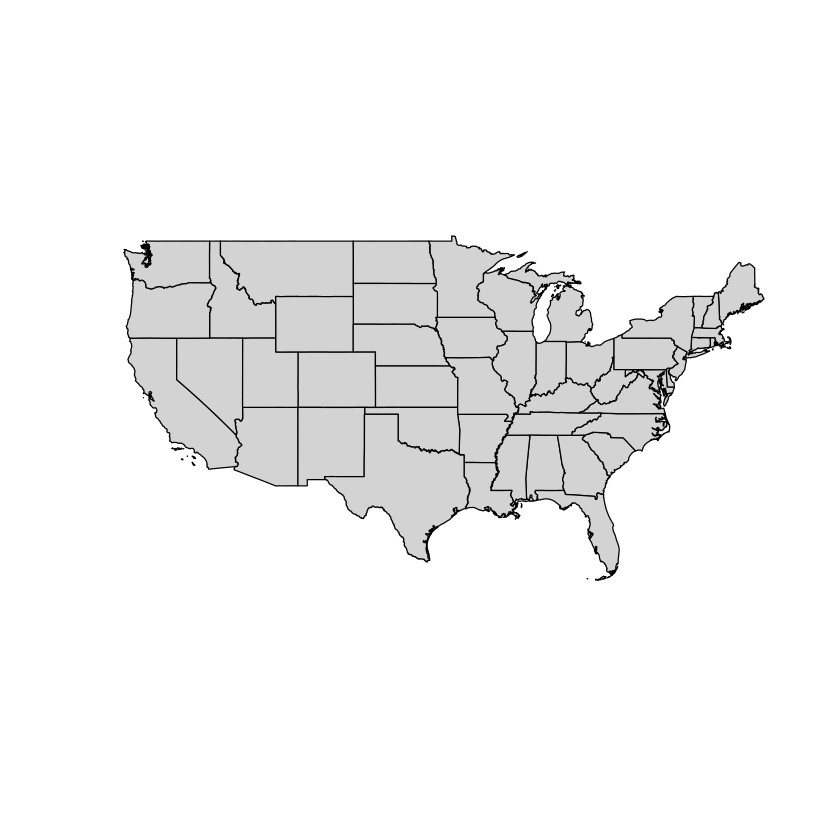

In [11]:
plot(states_limited$geometry, col='lightgrey')

## 3.3 Plot the two together

Now that we have both geodataframes in our environment, we can plot both in the same figure.

**NOTE**: Once we've created a plot (using base R's `plot` function), we can add more layers to it by calling subsequent `plot` commands and adding the argument `add=T`.

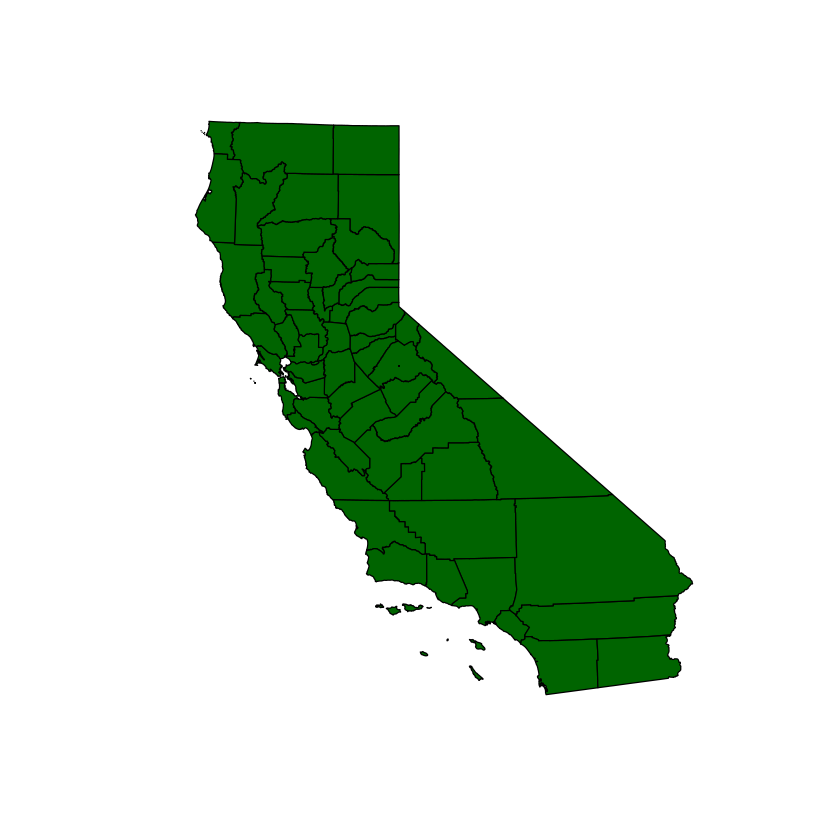

In [33]:
plot(counties$geometry, col='darkgreen')
plot(states_limited$geometry, col='lightgrey', add=T)


Oh no, what happened here? Where's our CA data?

<img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="20" align=left >  **Question** Without looking ahead, what do you think happened?



<br>
<br>
If you look at the coordinate values associated with the polygons in our two datasets, you'll see that the county data has much larger-magnitude numbers than our states data. It's represented in some different type of unit other than decimal degrees!

In [26]:
print(counties$geometry[[1]])

MULTIPOLYGON (((193446 -244342.6, 194033.8 -244353.7, 194127 -244351.8, 194156.9 -244351.2, 194496.1 -244342.8, 194517.9 -244342.3, 194609.6 -244355.6, 194701.3 -244367.7, 194768.3 -244377.7, 194809.1 -244378.7, 194821.8 -244379.4, 194938.9 -244360.5, 195026.4 -244348.6, 195112.5 -244327.6, 195793.3 -244310.8, 197221.6 -244275.3, 197791.8 -244261.1, 198843.9 -244234.8, 199516.2 -244217.9, 199836.7 -244209.7, 200598.2 -244190.5, 201272.2 -244173.3, 202292.8 -244147.4, 202680.8 -244137.4, 203028.9 -244128.5, 203320.4 -244125.1, 203398.4 -244124.2, 204077.2 -244116.3, 204184.4 -244115.1, 204640 -244109.8, 205313.7 -244101.9, 205559.7 -244097.5, 205671.6 -244097, 206848.4 -244083.6, 208039.6 -244069.2, 209225.9 -244049.8, 210412.2 -244030, 211425 -244013, 212437.5 -243996, 213672.6 -243975, 213689.6 -245134.4, 213706.7 -246293.6, 213723.7 -247453, 213739.9 -248561, 213740.6 -248612.3, 213749.6 -249229.2, 213712.5 -249591.6, 213734.1 -250586.7, 213738.2 -250769.9, 213739.8 -250843.1, 213770

In [27]:
print(states_limited$geometry[[1]])

MULTIPOLYGON (((-88.05338 30.50699, -88.05109 30.50886, -88.04565 30.51331, -88.04197 30.51738, -88.03867 30.52041, -88.0351 30.52197, -88.03241 30.52145, -88.02916 30.51965, -88.02622 30.51661, -88.02351 30.49257, -88.02433 30.49077, -88.02675 30.4911, -88.04504 30.50119, -88.05235 30.50559, -88.05338 30.50699)), ((-88.21121 30.32225, -88.21 30.3232, -88.20956 30.3222, -88.20895 30.32044, -88.20807 30.31954, -88.20873 30.31888, -88.20956 30.31902, -88.21082 30.32078, -88.21121 30.32225)), ((-88.22512 30.3218, -88.22128 30.32223, -88.21869 30.3219, -88.22103 30.32039, -88.22465 30.31989, -88.22652 30.32079, -88.22512 30.3218)), ((-88.26466 30.33554, -88.26367 30.33633, -88.26151 30.33548, -88.26006 30.33645, -88.25914 30.33713, -88.25914 30.339, -88.25842 30.34042, -88.25783 30.34274, -88.25776 30.34433, -88.25973 30.34563, -88.2621 30.34654, -88.26197 30.34779, -88.26111 30.34841, -88.26091 30.34932, -88.26118 30.35034, -88.26039 30.35045, -88.26026 30.35159, -88.2598 30.35306, -88.25

In fact, that means if we zoom in really close into our plot we'll probably see the states data plotted.

Let's do this by limiting the extent of our plot using `xlim` and `ylim` arguments.

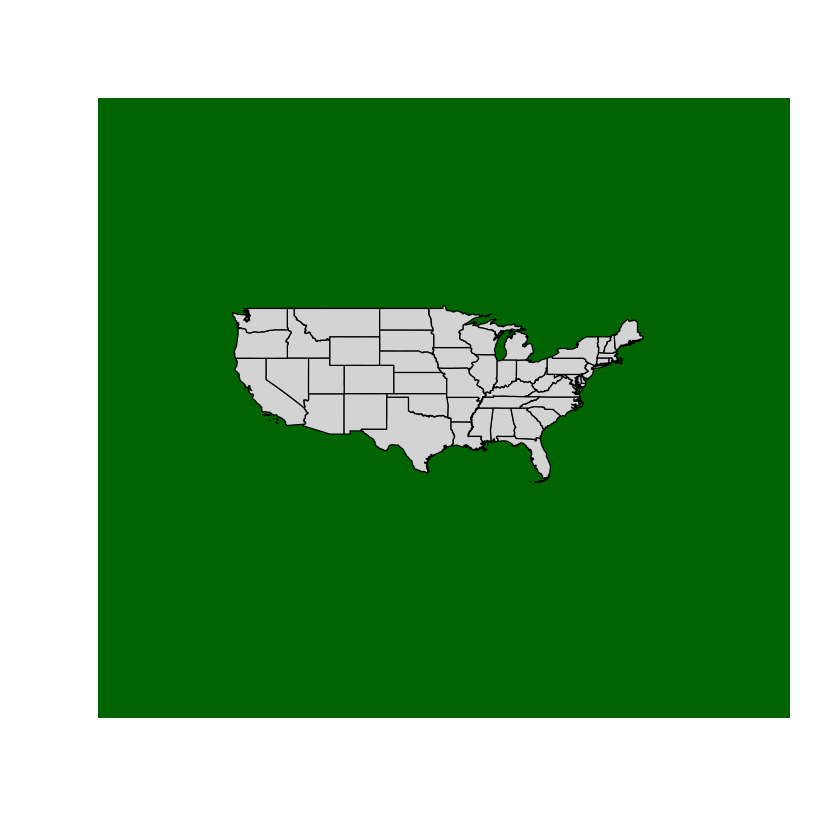

In [35]:
plot(counties$geometry, col='darkgreen', xlim = c(-140,-50), ylim = c(20,50))
plot(states_limited$geometry, col='lightgrey', add=T)


This is a key issue that you'll have to resolve time and time again when working with geospatial data!

It all revolves around **coordinate reference systems** and **projections**.

----------------------------

## 3.4 Coordinate Reference Systems (CRS)

<img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="20" align=left >  **Question** Do you have experience with Coordinate Reference Systems?

<br><br>As a refresher, a CRS describes how the coordinates in a geospatial dataset relate to locations on the surface of the earth. 

A `geographic CRS` consists of: 
- a 3D model of the shape of the earth (a **datum**), approximated as a sphere or spheroid (aka ellipsoid)
- the **units** of the coordinate system (e.g, decimal degrees, meters, feet) and 
- the **origin** (i.e. the 0,0 location), specified as the meeting of the **equator** and the **prime meridian**( 

A `projected CRS` consists of
- a geographic CRS
- a **map projection** and related parameters used to transform the geographic coordinates to `2D` space.
  - a map projection is a mathematical model used to transform coordinate data

### A Geographic vs Projected CRS
<img src ="https://www.e-education.psu.edu/natureofgeoinfo/sites/www.e-education.psu.edu.natureofgeoinfo/files/image/projection.gif" height="100" width="500">

#### There are many, many CRSs

Theoretically the number of CRSs is unlimited!

Why? Primariy, because there are many different definitions of the shape of the earth, multiplied by many different ways to cast its surface into 2 dimensions. Our understanding of the earth's shape and our ability to measure it has changed greatly over time.

#### Why are CRSs Important?

- You need to know the data about your data (or `metadata`) to use it appropriately.


- All projected CRSs introduce distortion in shape, area, and/or distance. So understanding what CRS best maintains the characteristics you need for your area of interest and your analysis is important.


- Some analysis methods expect geospatial data to be in a projected CRS

- Some R packages, but not all, implement dynamic reprojection from the input CRS to the required CRS and assume a specific CRS (WGS84) when a CRS is not explicitly defined.


- Most R spatial libraries, including `sf`, require geospatial data to be in the same CRS if they are being analysed together.

#### What you need to know when working with CRSs

- What CRSs used in your study area and their main characteristics
- How to identify, or `get`, the CRS of a geodataframe
- How to `set` the CRS of geodataframe (i.e. define the projection)
- Hot to `transform` the CRS of a geodataframe (i.e. reproject the data)

### Codes for CRSs commonly used with CA data

CRSs are typically referenced by an [EPSG code](http://wiki.gis.com/wiki/index.php/European_Petroleum_Survey_Group).  

It's important to know the commonly used CRSs and their EPSG codes for your geographic area of interest.  

For example, below is a list of commonly used CRSs for California geospatial data along with their EPSG codes.

##### Geographic CRSs
-`4326: WGS84` (units decimal degrees) - the most commonly used geographic CRS

-`4269: NAD83` (units decimal degrees) - the geographic CRS customized to best fit the USA. This is used by all Census geographic data.

>  `NAD83 (epsg:4269)` are approximately the same as `WGS84(epsg:4326)` although locations can differ by up to 1 meter in the continental USA and elsewhere up to 3m. That is not a big issue with census tract data as these data are only accurate within +/-7meters.
##### Projected CRSs

-`5070: CONUS NAD83` (units meters) projected CRS for mapping the entire contiguous USA (CONUS)

-`3857: Web Mercator` (units meters) conformal (shape preserving) CRS used as the default in web mapping

-`3310: CA Albers Equal Area, NAD83` (units meters)  projected CRS for CA statewide mapping and spatial analysis

-`26910: UTM Zone 10N, NAD83` (units meters) projected CRS for northern CA mapping & analysis

-`26911: UTM Zone 11N, NAD83` (units meters) projected CRS for Southern CA mapping & analysis

-`102641 to 102646: CA State Plane zones 1-6, NAD83` (units feet) projected CRS used for local analysis.

You can find the full CRS details on the website https://www.spatialreference.org

## 3.5 Getting the CRS

### Getting the CRS of an `sf` data.frame

`sf` data.frames have CRS metadata. It can be accessed using the `st_crs` function.

In [36]:
st_crs(counties)

Coordinate Reference System:
  User input: NAD83 / California Albers 
  wkt:
PROJCRS["NAD83 / California Albers",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["California Albers",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",-120,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",34,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel",40.5,
            ANGLEUNIT["degree",0.0174532925199

In [50]:
st_crs(states_limited)

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]

As we can clearly see from those two printouts (even if we don't understand all the content!),
the CRSs of our two datasets are different! **This explains why we couldn't overlay them correctly!**

-------------------------------------------------------------------
The above CRS definition specifies a bunch of information, including: 
- the name of the CRS (`WGS84`), 
- the axis units (`degree`)
- the shape (`datum`),
- and the origin (`Prime Meridian`, and the equator)
- and the area for which it is best suited (`World`)

> Notes:
>    - `geocentric` latitude and longitude assume a spherical (round) model of the shape of the earth
>    - `geodetic` latitude and longitude assume a spheriodal (ellipsoidal) model, which is closer to the true shape.
>    - `geodesy` is the study of the shape of the earth.

## 3.6 Setting the CRS

You can also set the CRS of a gdf using the same `st_crs` function, but feeding a value into it.  You would only set the CRS if is not defined or if you think it is incorrectly defined.

> In desktop GIS terminology setting the CRS is called **defining the CRS**

As an example, we could try to set the CRS of our data to EPSG code 26910 (UTM Zone 10 N, NAD83 datum).

Note that `sf` lets us specify CRSs using just the EPSG codes as R integers!

In [51]:
# first set the CRS to None
st_crs(states_limited) = 26910

Warning message:
“st_crs<- : replacing crs does not reproject data; use st_transform for that”


See that warning message? That's telling us that changing the CRS of a dataset by just replacing the current value using `st_crs` does not actually reproject data.

**THIS IS REALLY IMPORTANT!** If we want to reproject a dataset (to reconcile its CRS with that of another dataset, for example), then this is **NOT THE WAY TO DO IT!** 

We'll see how to correctly reproject a dataset in just a second. In the meantime, **we'd better undo what we just did!**

In [52]:
st_crs(states_limited) = st_crs(states)

Warning message:
“st_crs<- : replacing crs does not reproject data; use st_transform for that”


In [53]:
# Check it again
st_crs(states_limited)

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]

## PHEW! Okay! ... Never do that again! :)

## 3.7 Transforming or Reprojecting the CRS
You can transform the CRS of a geodataframe with the `st_transform` function.


> In desktop GIS terminology transforming the CRS is called **projecting the data** (or **reprojecting the data**)

When you do this you'll want to save the output to a new `sf` data.frame.

In [54]:
states_limited_utm10 = st_transform(states_limited, crs=26910)

Now take a look at the CRS.

In [55]:
st_crs(states_limited_utm10)

Coordinate Reference System:
  User input: EPSG:26910 
  wkt:
PROJCRS["NAD83 / UTM zone 10N",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["UTM zone 10N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-123,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",

You can see the result immediately by plotting the data.

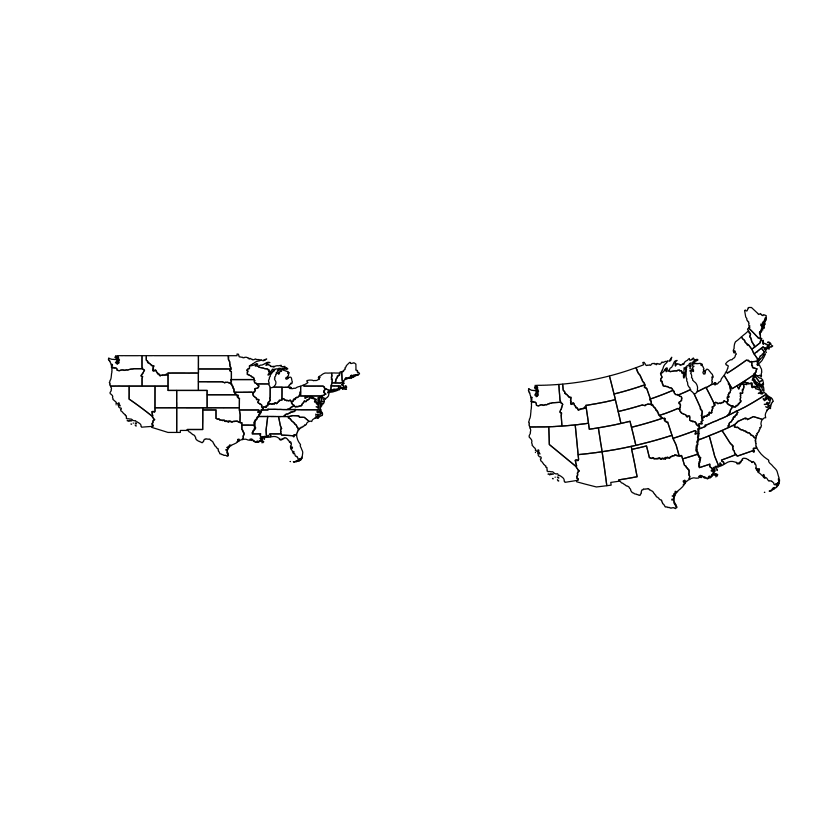

In [57]:
par(mfrow=c(1,2))

# plot geographic sf data.frame
plot(states_limited$geometry, asp=1)

# plot utm sf data.frame
plot(states_limited_utm10$geometry, asp=1)

In [ ]:
# Your thoughts here

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Questions
</div>

1. What two key differences do you see between the two plots above?
1. Do either of these plotted USA maps look good?
1. Try looking at the common CRS EPSG codes above and see if any of them look better for the whole country than what we have now. Then try transforming the states data to the CRS that you think would be best and plotting it. (Use the code cell two cells below.)

In [59]:
# YOUR CODE HERE







**Double-click to see solution!**

<!--
#SOLUTION 
states_limited_conus = st_transform(states_limited, crs=5070)
plot(states_limited_conus$geometry, asp=1);
-->

## 3.8 Plotting states and counties together

Now that we know what a CRS is and how we can set them, let's convert our counties `sf` data.frame to match up with out states' CRS.

In [60]:
# Convert counties data to UTM 10N, NAD83
counties_utm10 = st_transform(counties, crs = 26910)

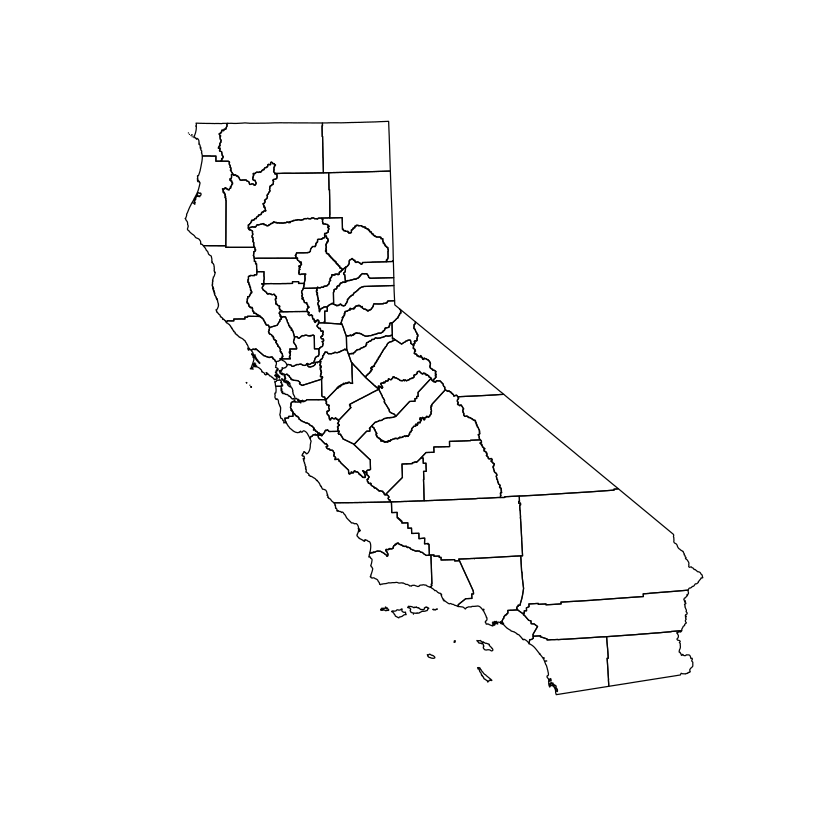

In [61]:
plot(counties_utm10$geometry)

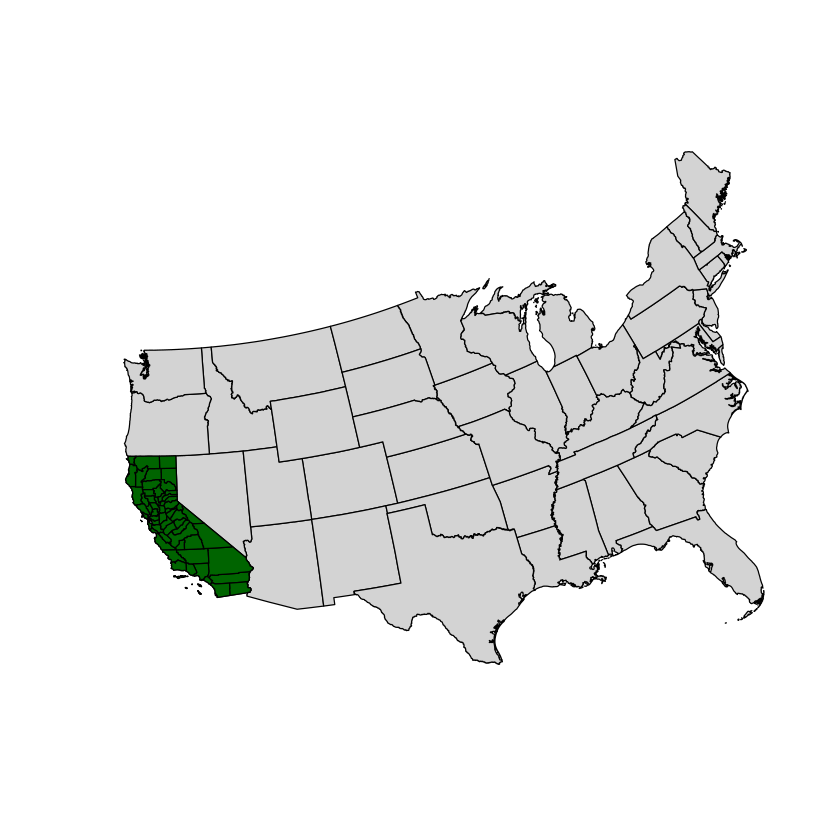

In [62]:
# Plot it together!
plot(states_limited_utm10$geometry, col = 'lightgrey')
plot(counties_utm10$geometry, col='darkgreen', add=T)

Since we know that the best CRS to plot the contiguous US from the above question is 5070, let's also transform and plot everything in that CRS.

In [63]:
counties_conus = st_transform(counties, crs = 5070)

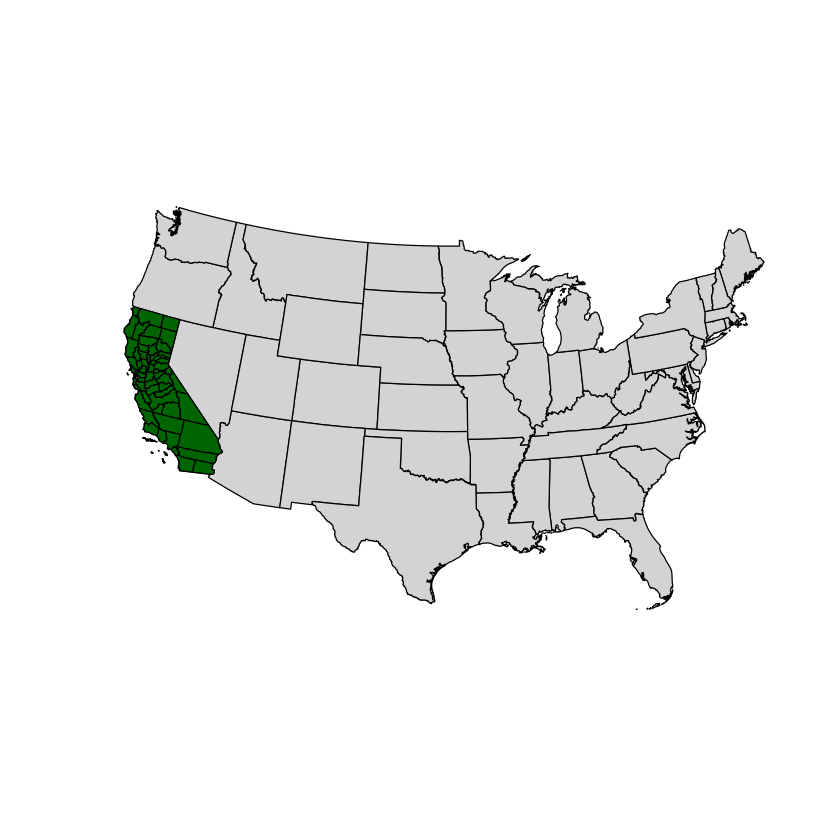

In [64]:
plot(states_limited_conus$geometry, col = 'lightgrey')
plot(counties_conus$geometry, col = 'darkgreen', add=T)

### Overlay maps in `tmap`

<br>

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Question
</div>

You may have noticed that we have not used `tmap` to create any of the overlay maps in this notebook. "Why?", you might ask.

Check out the code below, then decide whether `tmap` would be a good choice for visually checking whether two datasets have their CRSs correctly reconciled, and why or why not.

In [68]:
print('EPSG CODE, states_limited_utm10')
st_crs(states_limited_utm10)$epsg
print('EPSG CODE, counties_conus')
st_crs(counties_conus)$epsg

[1] "EPSG CODE, states_limited_utm10"


[1] 26910

[1] "EPSG CODE, counties_conus"


[1] 5070

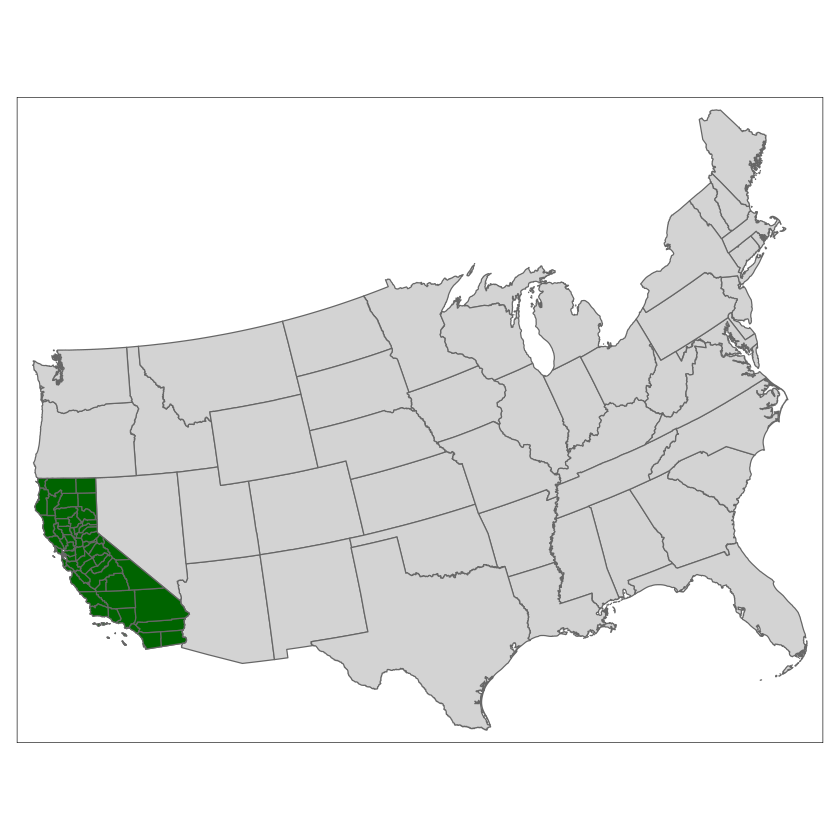

In [66]:
tm_shape(states_limited_utm10) +
  tm_polygons(col='lightgrey') +
tm_shape(counties_conus) +
  tm_polygons(col='darkgreen')

`tmap` is such a wonderful, high-level package that it automatically reprojects all of a map's layers on the fly before mapping them!

This is a really handy feature, but it means that `tmap` is not useful for visually checking that we have successfully aligned our datasets!

## 3.9 Recap

In this lesson we learned about...
- Coordinate Reference Systems 
- Getting the CRS of a geodataframe
    - `st_crs`
- Transforming/repojecting CRS
    - `st_transform`
- Overlaying maps

## Exercise: CRS Management

Now it's time to take a crack and managing the CRS of a new dataset. In the code cell below, write code to:

1. Bring in the CA places data (`notebook_data/census/Places/cb_2018_06_place_500k.zip`)
2. Check if the CRS is EPSG code 26910. If not, transform the CRS
3. Plot the California counties and places together.

To see the solution, double-click the Markdown cell below.

In [73]:
# YOUR CODE HERE








## Double-click to see solution!

<!--

# SOLUTION

# 1. Bring in the CA places data
california_places = st_read('notebook_data/census/Places/cb_2018_06_place_500k.shp')
head(california_places)

# 2. Check and transorm the CRS if needed
st_crs(california_places)
california_places_utm10 = st_transform(california_places, crs = 26910)

# 3. Plot the California counties and places together
plot(counties_utm10$geometry, col='lightgrey')
plot(california_places_utm10$geometry, col='purple',add = T)

-->

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        
